In [392]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [393]:
train = pd.read_csv('Zindi_Data/Train.csv')

In [394]:
train.head()

,ID,text,label
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression
1,9JDAGUV3,Why do I get hallucinations?,Drugs
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression
3,6UY7DX6Q,Why is life important?,Suicide
4,FYC0FTFB,How could I be helped to go through the depres...,Depression


In [395]:
train.describe()

,ID,text,label
count,616,616,616
unique,616,603,4
top,PB50CNUF,How can I stop using alcohol?,Depression
freq,1,4,352


In [396]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      616 non-null    object
 1   text    616 non-null    object
 2   label   616 non-null    object
dtypes: object(3)
memory usage: 14.6+ KB


In [397]:
train.count()

ID       616
text     616
label    616
dtype: int64

(array([352.,   0.,   0.,  58.,   0.,   0.,  66.,   0.,   0., 140.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

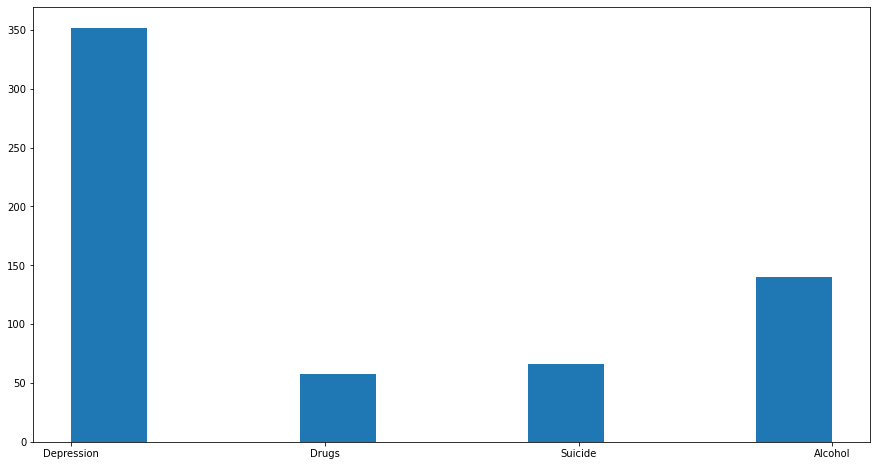

In [398]:
plt.figure(figsize=(15, 8))
plt.hist(x=train['label'], bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000AA81242FC8>]],
      dtype=object)

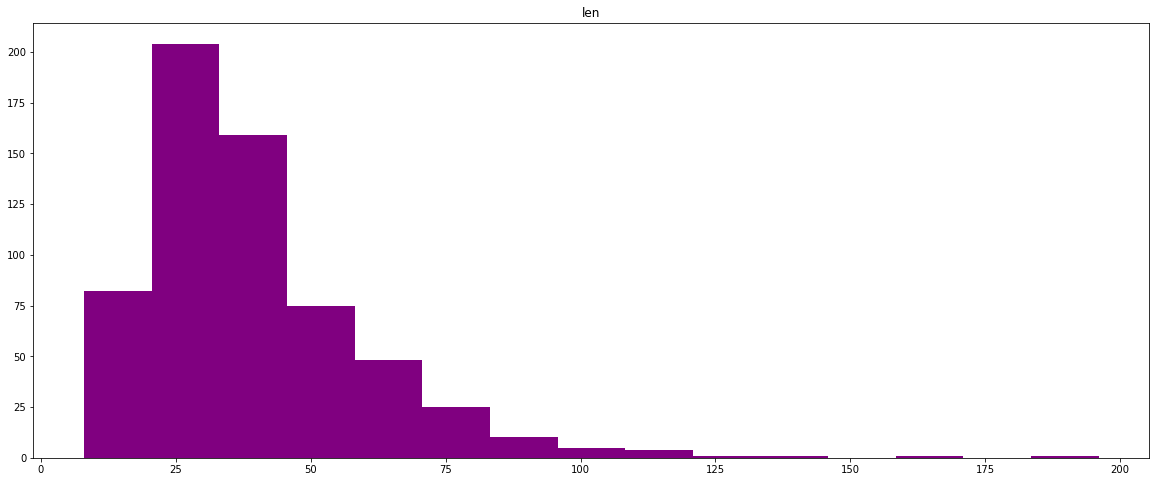

In [399]:
train['len'] = train['text'].apply(len)
train.hist(column='len', figsize=(20, 8), bins=15 ,grid=False, color='purple')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000AAFF0B5208>,
      dtype=object)

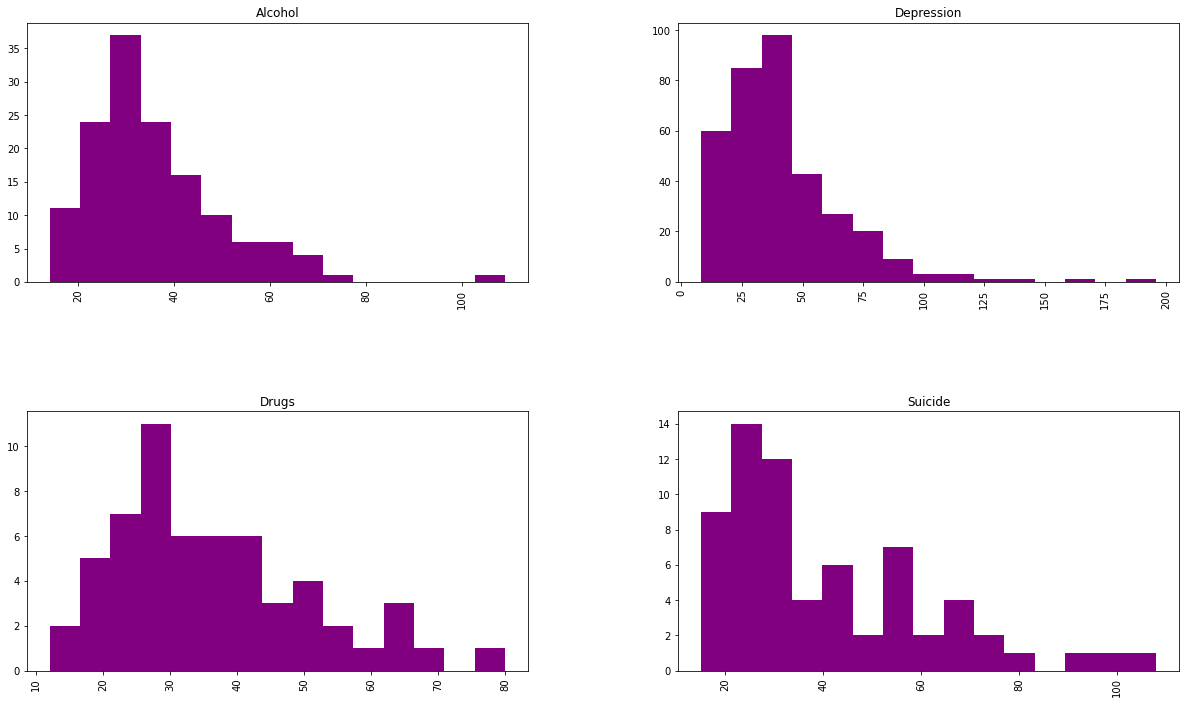

In [400]:
train.hist(column='len', by='label', figsize=(20, 12), bins=15, color='purple')

# Seems like there is no correlation between text length and Mental state !

In [401]:
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [402]:
def text_process(mess):
    first = [char for char in mess if char not in string.punctuation]
    second = ''.join(first)
    third = second.split()
    fourth = [word for word in third if word not in stopwords.words('english')]
    return fourth

In [403]:
cv = CountVectorizer(analyzer=text_process)
X = cv.fit_transform(train['text'])
y = train['label']

In [404]:
len(cv.vocabulary_)

823

In [405]:
from sklearn.model_selection import train_test_split

In [406]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#
#
#



# Building model

In [407]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
model = SVC(probability=True)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [408]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

     Alcohol       1.00      0.71      0.83        45
  Depression       0.74      1.00      0.85       101
       Drugs       1.00      0.45      0.62        22
     Suicide       1.00      0.35      0.52        17

    accuracy                           0.81       185
   macro avg       0.93      0.63      0.71       185
weighted avg       0.86      0.81      0.79       185

[[ 32  13   0   0]
 [  0 101   0   0]
 [  0  12  10   0]
 [  0  11   0   6]]


In [409]:
pred_proba = model.predict_proba(X_test)

#
#
#
# Another approach

In [410]:
from sklearn.utils import shuffle

def Classify_per_label(label):
    lab1 = train[train.label == label]
    lab1.loc[:, 'label'] = 1
    lab2 = train[train.label != label]
    lab2.loc[:, 'label'] = 0
    df = pd.concat([lab1, lab2])
    df = shuffle(df)
    
    X = cv.transform(df['text'])
    y = df['label']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    
    model = SVC(probability=True)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:, 1]
    
    return [pred, pred_proba, y_test, model]

In [411]:
def report(y_true, y_pred):
    print('=== Report ===')
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))
    print('\n\n')

In [412]:
alc_pred, alc_pred_proba, alc_y_test, alc_mod = Classify_per_label('Alcohol')
dep_pred, dep_pred_proba, dep_y_test, dep_mod = Classify_per_label('Depression')
dru_pred, dru_pred_proba, dru_y_test, dru_mod = Classify_per_label('Drugs')
sui_pred, sui_pred_proba, sui_y_test, sui_mod = Classify_per_label('Suicide')

c:\users\khaled\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
c:\users\khaled\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
c:\users\khaled\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [413]:
report(alc_y_test, alc_pred)
report(dep_y_test, dep_pred)
report(dru_y_test, dru_pred)
report(sui_y_test, sui_pred)

=== Report ===
              precision    recall  f1-score   support

           0       0.90      0.99      0.95       148
           1       0.95      0.57      0.71        37

    accuracy                           0.91       185
   macro avg       0.93      0.78      0.83       185
weighted avg       0.91      0.91      0.90       185

[[147   1]
 [ 16  21]]



=== Report ===
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        77
           1       0.90      0.95      0.93       108

    accuracy                           0.91       185
   macro avg       0.92      0.91      0.91       185
weighted avg       0.91      0.91      0.91       185

[[ 66  11]
 [  5 103]]



=== Report ===
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       162
           1       1.00      0.30      0.47        23

    accuracy                           0.91       185
   macro avg       0.96      0.

#
#
#
# Preparing submission file

In [414]:
test = pd.read_csv('Zindi_Data/Test.csv')
Input = cv.transform(test['text'])

sub_alc = alc_mod.predict_proba(Input)[:, 1]
sub_dep = dep_mod.predict_proba(Input)[:, 1]
sub_dru = dru_mod.predict_proba(Input)[:, 1]
sub_sui = sui_mod.predict_proba(Input)[:, 1]

In [415]:
Sample = pd.read_csv('Zindi_Data/SampleSubmission.csv')

In [416]:
Sample['Alcohol'] = pd.Series(sub_alc)
Sample['Depression'] = pd.Series(sub_dep)
Sample['Drugs'] = pd.Series(sub_dru)
Sample['Suicide'] = pd.Series(sub_sui)

In [417]:
Sample.to_csv('out.csv', index=False)